# Linear Discriminant Analysis (LDA)
LDA reduces dimensions by separating the labeled (known) categories as far as possible.

### LDA vs PCA
<img src="images/lda/lda_vs_pca.png" height="75%" width="75%"></img>

#### Similarties
1. Both rank the new axes (LD1 and LD2) or (PC1 and PC2) in order of importance where LD1 or PC1 are the most important and LD2 or PC2 are the second most important.
2. Both methods allow you to see which independent variables correlate with the new axes (as graphed below).

#### Differences
1. Because the categories in LDA are known, LDA is a supervised model unlike PCA which is unsupervised.    
2. LDA focuses on maximizing separability of categories while PCA focuses on variation of categories.

### Linear Discriminants (LD) Meaning
Let's say hypothetically we perform LDA with LD1 = 60% and LD2 = 40% as the expected variance percentages.
- LD1 (the first largest variation) accounts for 60% of the variation (separation) between the categories
- LD2 (the first largest variation) accounts for 40% of the variation (separation) between the categories

Then we would have a 2D data set using LD1 and LD2 with 100% of the separation of categories from the large data set!

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# import the data set
wine_df = pd.read_csv("datasets/wine.csv")

wine_df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [3]:
# receive only the independent variables, disregard the dependent variable Customer_Segment
x = wine_df.iloc[:, 0:13].values

# receive the Customer_Segment column
y = wine_df.iloc[:, 13].values

In [4]:
# split the data set into training and testing data sets
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [5]:
# import a Standarization Scaler for Feature Scaling
from sklearn.preprocessing import StandardScaler

# feature scale the training and testing sets
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

# LDA Model

In [6]:
# import the LDA model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [7]:
# create an LDA with 2 linear discriminants
lda = LDA(n_components=2)

# fit the x_train with y_train, then transform the x_train and x_test 
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)

"""
show the first 10 rows of the reduced data frame

Now there are only 2 independent variables (LD1 and LD2).
"""
x_train[:10]

array([[ 3.57315552,  1.94018924],
       [ 0.85475898, -2.08182977],
       [ 0.62173655, -3.06234453],
       [ 4.80786412,  2.00638739],
       [-3.8579759 ,  0.14987256],
       [-3.59455458,  1.24961706],
       [-0.53772906, -3.0852704 ],
       [ 0.04058577, -2.47312446],
       [ 0.99835348, -3.36989668],
       [-3.74095658,  1.94844242]])

In [8]:
"""
the explained variance (LDs) of each linear discriminants in descending order

LD1 equals 73.93% and LD2 equals 26.07% of the data set's scalings.
This means the LDA received 100% of the data set's categories scaling
from only 2 linear discriminants.
"""
lda.explained_variance_ratio_

array([0.73931691, 0.26068309])

# Graph LDA
Below is a graph of the training set's columns and their separability for each linear discriminant. Based on the graph of the LDA below, there seems to be clusters on the bottom-right and top-right.

In [9]:
# create a DataFrame using each column's scalings per linear discriminant
reduced_wine_df = pd.DataFrame(
    lda.scalings_.T,
    columns=wine_df.iloc[:, 0:13].columns,
    index=["LD1", "LD2"]
)

reduced_wine_df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
LD1,-0.252484,0.194618,-0.093176,0.49989,0.005731,0.634021,-2.200525,-0.257124,0.201938,0.625563,-0.133744,-1.018062,-0.905297
LD2,0.618085,0.420868,0.605092,-0.52090,-0.001419,-0.104575,-0.197956,-0.070884,-0.309612,0.601955,-0.325317,-0.021049,0.912580


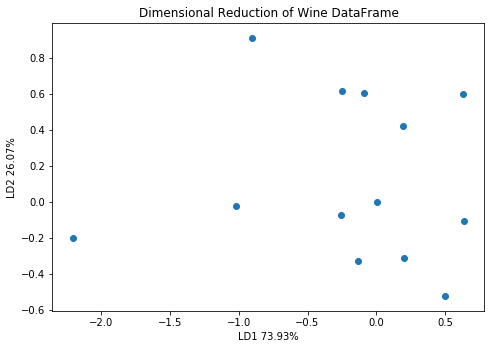

In [10]:
# create a blank plot figure
figure = plt.figure()

# add the graph's axes with their aspect ratios
axes = figure.add_axes([1, 1, 1, 1])

# set the LD1 and LD2 labels on the axes
rounded_ld1 = str(round(lda.explained_variance_ratio_[0] * 100, 2))
rounded_ld2 = str(round(lda.explained_variance_ratio_[1] * 100, 2))
axes.set_xlabel("LD1 " + rounded_ld1 + "%")
axes.set_ylabel("LD2 " + rounded_ld2 + "%")

# set the title
axes.set_title("Dimensional Reduction of Wine DataFrame")

# scatter plot the LD1 (x-axis) and LD2 (y-axis)
axes.scatter(x=reduced_wine_df.loc["LD1"], y=reduced_wine_df.loc["LD2"])

# Logistic Regression Model
Let's use a logistic regression model on the transformed data set from the LDA, and let's see how well the model predicts the test set.

In [11]:
# import the logistic regression class
from sklearn.linear_model import LogisticRegression

In [12]:
# create a logistic regression classifier with a random state (seed) of 0, then fit to training set
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

/home/pravat/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pravat/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [13]:
# predict x_test
y_pred = classifier.predict(x_test)

y_pred

array([1, 3, 2, 1, 2, 2, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1])

# Confusion Matrix
Let's create a confusion matrix for the logistic regression model. The matrix will be of size 3x3 because there are 3 values in the y_pred Array: 1, 2, or 3.

Based on the confusion matrix, we received 36 correct predictions and 0 incorrect prediction, so the accuracy of the model is 100%. This high accuracy is probably because there are now only 2 independent variables (LD1 and LD2) that explain the majority variance of the data set. Hence, those 2 linear discriminants became great predictors for the model.

In [15]:
# import the confusion matrix function
from sklearn.metrics import confusion_matrix

In [16]:
# create a confusion matrix that compares the y_test (actual) to the y_pred (prediction)
cm = confusion_matrix(y_test, y_pred)

"""
Read the Confusion Matrix diagonally:
14 + 16 + 6 = 36 correct predictions
0 + 0 + 1 + 0 + 0 + 0 = 0 incorrect predictions
"""
cm

array([[14,  0,  0],
       [ 0, 16,  0],
       [ 0,  0,  6]])

# Visualization of Results

In [17]:
# import a listed color map
from matplotlib.colors import ListedColormap

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


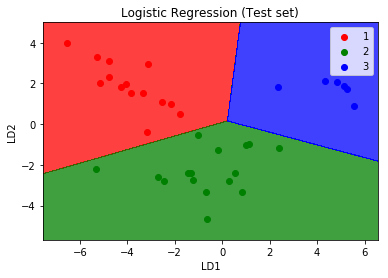

In [19]:
# create a red (Purchased) and green (Not Purchased) separation at the classifier's threshold
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# scatter each data point from the training set: red = Purchased, green = Not Purchased
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
    
# add labels (the axes are the two independent variables), then show the graph  
plt.title('Logistic Regression (Test set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()